<a href="https://colab.research.google.com/github/mohamadhasan-zeinali/text-classification-using-Bert/blob/main/Text_classification_using_bert_%26_tensoreflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

pip install tensorflow

SyntaxError: ignored

In [5]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 12.6 MB/s 


In [6]:
#import library

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd



In [7]:
#load data
path = "/content/drive/MyDrive/sheets/SPAM text message 20170820 - Data.csv"
df = pd.read_csv(path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#show group of data 

df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [9]:
#count-data 

df['Category'].value_counts()


ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
747/4825


0.15481865284974095

In [11]:
#create data frem 

df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [12]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [13]:
#balance data  >> down-sampling technic

df_ham_sampled = df_ham.sample(df_spam.shape[0])
df_ham_sampled.shape

(747, 2)

In [14]:

#balance

df.balanced  = pd.concat([df_spam,df_ham_sampled])
df.balanced.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


(1494, 2)

In [15]:
df.balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [16]:
df.balanced.sample(5)

,Category,Message
2612,spam,Knock Knock Txt whose there to 80082 to enter ...
3596,ham,Huh but i cant go 2 ur house empty handed right?
5377,spam,The current leading bid is 151. To pause this ...
121,spam,URGENT! Your Mobile No. was awarded £2000 Bonu...
2048,ham,No de. But call me after some time. Ill tell y...


In [17]:
df.balanced['spam'] = df.balanced['Category'].apply(lambda x: 1  if  x=='spam' else 0)
df.balanced.sample(5)

,Category,Message,spam
1848,spam,FREE NOKIA Or Motorola with upto 12mths 1/2pri...,1
135,spam,Want 2 get laid tonight? Want real Dogging loc...,1
824,spam,25p 4 alfie Moon's Children in need song on ur...,1
3059,spam,You are now unsubscribed all services. Get ton...,1
2152,ham,I surely dont forgot to come:)i will always be...,0


#model_selection

In [18]:
#load sklearn library 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.balanced['Message'],
                        df.balanced['spam'], stratify = df.balanced['spam'])

In [19]:
x_train.head(4)

1474    Will do, you gonna be at blake's all night? I ...
801     Last Chance! Claim ur £150 worth of discount v...
2374    XMAS Prize draws! We are trying to contact U. ...
2436                           Oh ya ya. I remember da. .
Name: Message, dtype: object

#bert preprocess

In [20]:
bert_preprocess  = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

#embedibg


In [21]:
def  get_sentence_embeding(sentences):
     preprocess_text= bert_preprocess(sentences)
     return  bert_encoder(preprocess_text)['pooled_output']

get_sentence_embeding([
          "500$ discount. hurry up",
          "Bhavin, are you up for a volleybal game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435166 , -0.5132724 , -0.88845706, ..., -0.7474883 ,
        -0.7531471 ,  0.91964483],
       [-0.8720836 , -0.50544   , -0.9444667 , ..., -0.8584748 ,
        -0.71745366,  0.88082993]], dtype=float32)>

#get embeding vector

In [22]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [23]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606924 , -0.14219402,  0.49604616, ...,  0.4216532 ,
        -0.5322144 ,  0.80312175],
       [-0.86023194, -0.21242903,  0.4915702 , ...,  0.3979814 ,
        -0.60506254,  0.8447165 ],
       [-0.7128873 , -0.15463948,  0.38401625, ...,  0.35278714,
        -0.50991404,  0.7347418 ],
       [-0.825335  , -0.35550606, -0.59069705, ..., -0.01613726,
        -0.61417615,  0.872303  ],
       [-0.7504137 , -0.268126  , -0.26689777, ...,  0.02839315,
        -0.59381   ,  0.7974992 ],
       [-0.7854428 , -0.29949576,  0.4102777 , ...,  0.5222555 ,
        -0.4957344 ,  0.8150739 ]], dtype=float32)>

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]])

array([[0.99110895]], dtype=float32)

In [25]:
cosine_similarity([e[0]], [e[3]])

array([[0.8470383]], dtype=float32)

In [26]:
cosine_similarity([e[4]], [e[1]])

array([[0.91666865]], dtype=float32)

# Build Model

In [27]:
#1 sequence  2 function
#bert layers
text_input  = tf.keras.layers.Input(shape=(),dtype=tf.string, name="text")
preprocess_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocess_text)

#create neural networks layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

#compile model

In [29]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

#train model 

In [30]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 34s 679ms/step - loss: 0.6404 - accuracy: 0.6482 - precision: 0.6596 - recall: 0.6125
Epoch 2/10
35/35 [==============================] - 24s 674ms/step - loss: 0.5198 - accuracy: 0.7911 - precision: 0.7717 - recall: 0.8268
Epoch 3/10
35/35 [==============================] - 23s 671ms/step - loss: 0.4378 - accuracy: 0.8616 - precision: 0.8597 - recall: 0.8643
Epoch 4/10
35/35 [==============================] - 23s 670ms/step - loss: 0.3922 - accuracy: 0.8938 - precision: 0.8821 - recall: 0.9089
Epoch 5/10
35/35 [==============================] - 23s 670ms/step - loss: 0.3685 - accuracy: 0.8920 - precision: 0.8714 - recall: 0.9196
Epoch 6/10
35/35 [==============================] - 24s 672ms/step - loss: 0.3410 - accuracy: 0.8911 - precision: 0.8883 - recall: 0.8946
Epoch 7/10
35/35 [==============================] - 23s 671ms/step - loss: 0.3230 - accuracy: 0.9054 - precision: 0.9039 - recall: 0.9071
Epoch 8/10
35/35 [================

In [31]:

model.evaluate(x_test, y_test)

12/12 [==============================] - 9s 639ms/step - loss: 0.2833 - accuracy: 0.9011 - precision: 0.8947 - recall: 0.9091


[0.28332528471946716,
 0.9010695219039917,
 0.8947368264198303,
 0.9090909361839294]

In [32]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [33]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[167,  20],
       [ 17, 170]])

Text(33.0, 0.5, 'Truth')

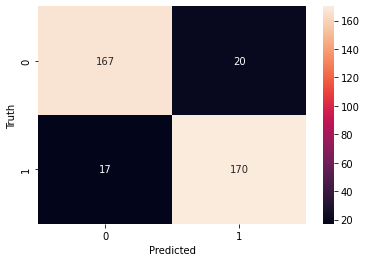

In [35]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       187
           1       0.89      0.91      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



#inference

In [42]:
reviews = [
    'rnter the code in 74874845 lmvklvdmnkndvj;d',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "this is the best toturial.", 
    "854d4wddd,,nearest in the contry'n near XXXomo e c ec salam '"
]
model.predict(reviews)

array([[0.5316395 ],
       [0.8110688 ],
       [0.7542693 ],
       [0.19204201],
       [0.04864514],
       [0.6517397 ]], dtype=float32)